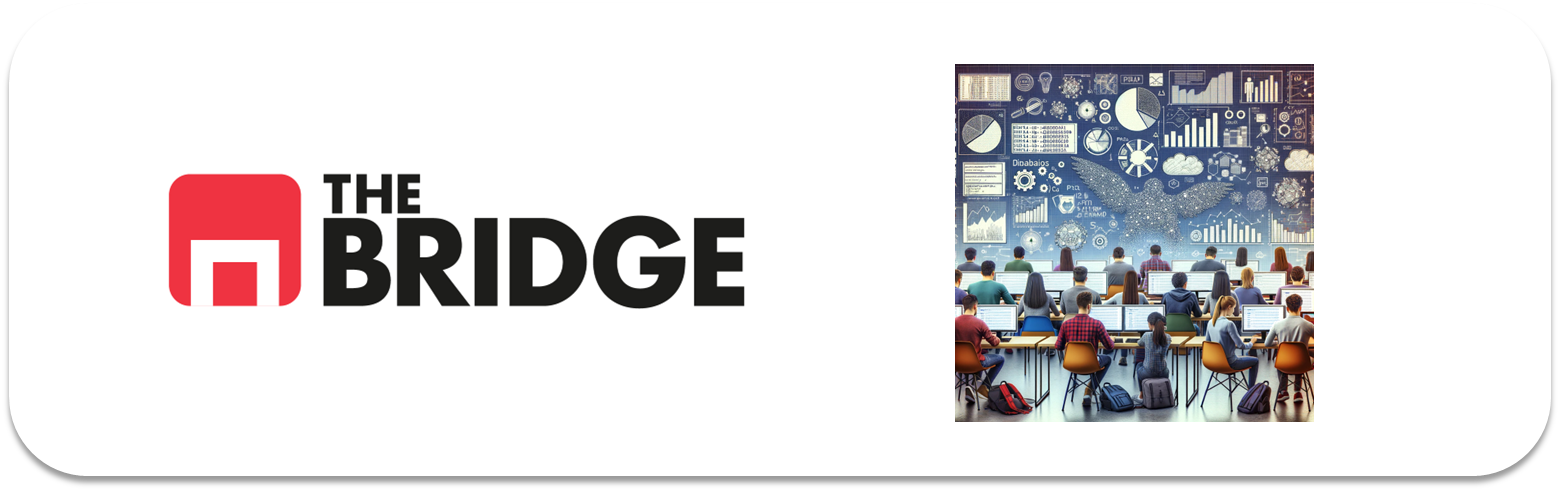

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [2]:
import bootcampviztools as bt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./data/titanic.csv")

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
target = "survived"
excluidas = ["embark_town", "alive", "class", "adult_male"]

In [5]:
df.deck.value_counts(dropna=False, normalize=True)

deck
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: proportion, dtype: float64

In [6]:
df_deck = df.copy()
df_deck["deck"] = df_deck.deck.fillna("UNK")
df_deck.deck.value_counts(normalize=True)

deck
UNK    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: proportion, dtype: float64

In [7]:
features_base = [col for col in df_deck.columns if col not in excluidas]
features_base.remove("deck")

features_base_deck = [col for col in df_deck.columns if col not in excluidas]

In [8]:
df_deck["embarked"].value_counts(dropna=False, normalize=True)

embarked
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: proportion, dtype: float64

In [9]:
df_deck = df_deck.dropna(subset="embarked")

df_deck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         889 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


In [11]:
train_set, test_set = train_test_split(df_deck, test_size= 0.2, stratify= df_deck["embarked"], random_state= 42)

In [12]:
train_set.embarked.value_counts(normalize= True)

embarked
S    0.724332
C    0.188467
Q    0.087201
Name: proportion, dtype: float64

In [13]:
test_set.embarked.value_counts(normalize= True)

embarked
S    0.724719
C    0.191011
Q    0.084270
Name: proportion, dtype: float64

In [14]:
es_hombre = train_set.who == "man"
es_mujer = train_set.who == "woman"
es_child = train_set.who == "child"

median_man = train_set[es_hombre]["age"].median()
median_woman = train_set[es_mujer]["age"].median()
median_child = train_set[es_child]["age"].median()

es_nulo = train_set.age.isna()
es_nulo_test = test_set.age.isna()

train_set.loc[es_hombre & es_nulo, "age"] = median_man
train_set.loc[es_mujer & es_nulo, "age"] = median_woman
train_set.loc[es_child & es_nulo, "age"] = median_child


test_set.loc[(test_set.who == "man") & es_nulo_test, "age"] = median_man
test_set.loc[(test_set.who == "woman") & es_nulo_test, "age"] = median_woman
test_set.loc[(test_set.who == "child") & es_nulo_test, "age"] = median_child

In [15]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 223 to 142
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     178 non-null    int64  
 1   pclass       178 non-null    int64  
 2   sex          178 non-null    object 
 3   age          178 non-null    float64
 4   sibsp        178 non-null    int64  
 5   parch        178 non-null    int64  
 6   fare         178 non-null    float64
 7   embarked     178 non-null    object 
 8   class        178 non-null    object 
 9   who          178 non-null    object 
 10  adult_male   178 non-null    bool   
 11  deck         178 non-null    object 
 12  embark_town  178 non-null    object 
 13  alive        178 non-null    object 
 14  alone        178 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 19.8+ KB


In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     711 non-null    int64  
 1   pclass       711 non-null    int64  
 2   sex          711 non-null    object 
 3   age          711 non-null    float64
 4   sibsp        711 non-null    int64  
 5   parch        711 non-null    int64  
 6   fare         711 non-null    float64
 7   embarked     711 non-null    object 
 8   class        711 non-null    object 
 9   who          711 non-null    object 
 10  adult_male   711 non-null    bool   
 11  deck         711 non-null    object 
 12  embark_town  711 non-null    object 
 13  alive        711 non-null    object 
 14  alone        711 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 79.2+ KB


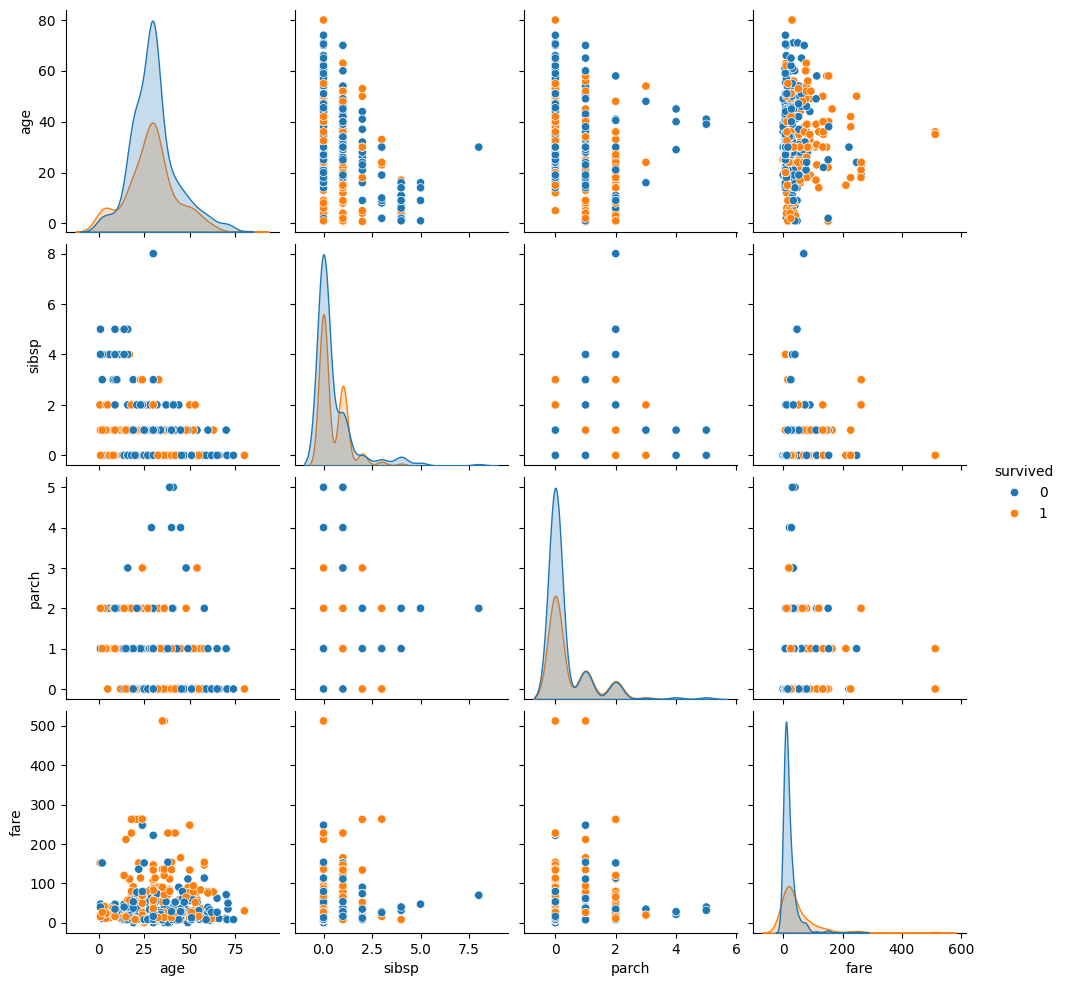

In [17]:
features_num = ["age","sibsp","parch","fare"]
sns.pairplot(train_set[features_num + [target]], hue = target)

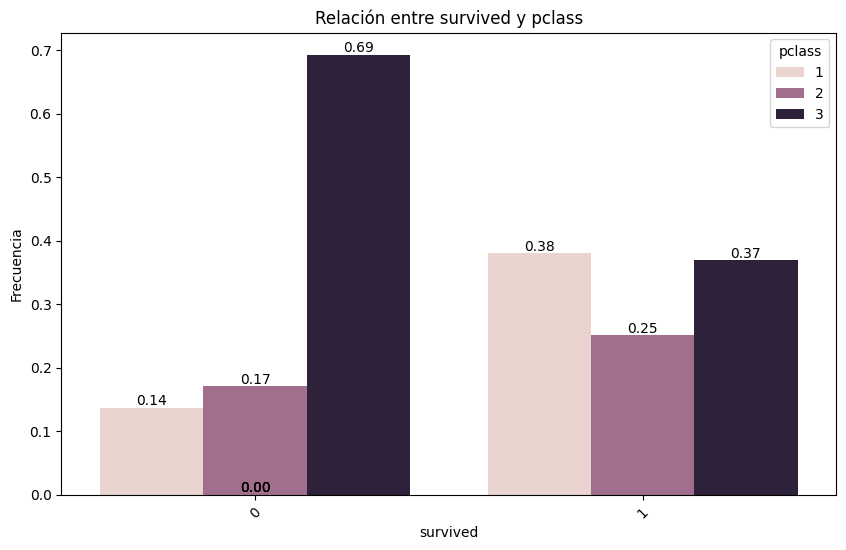

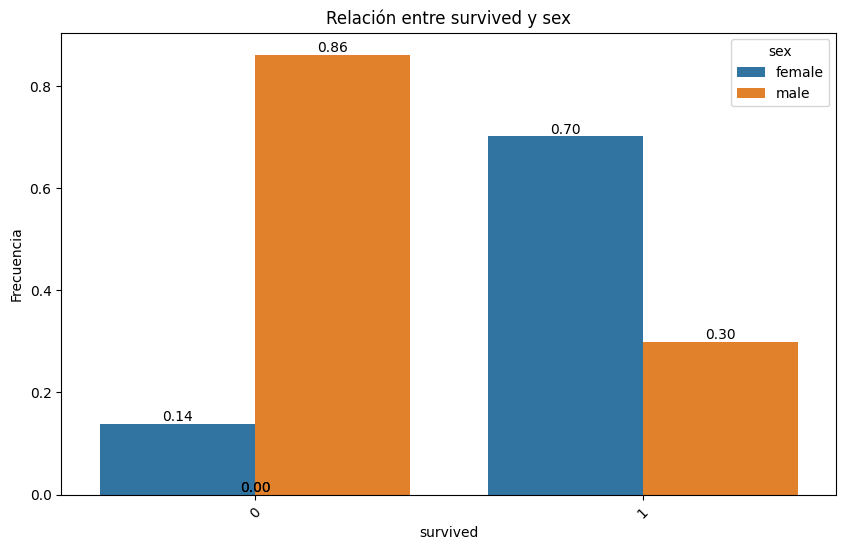

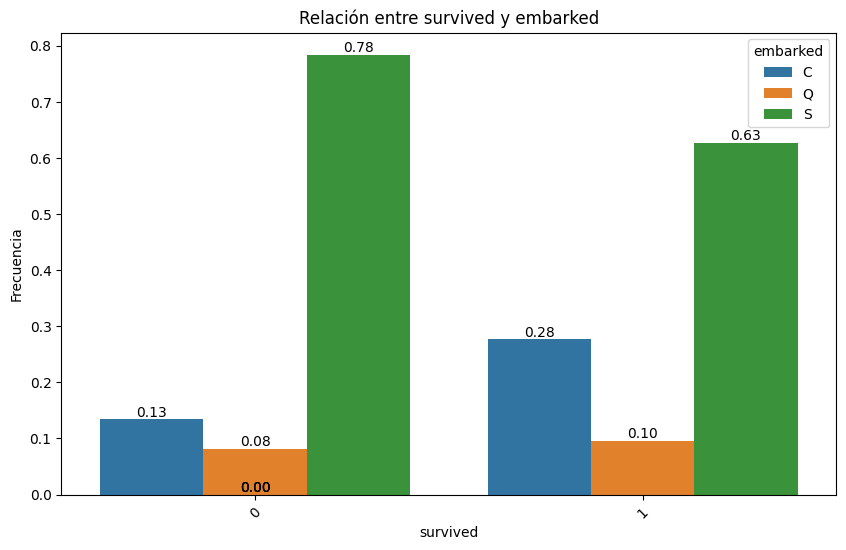

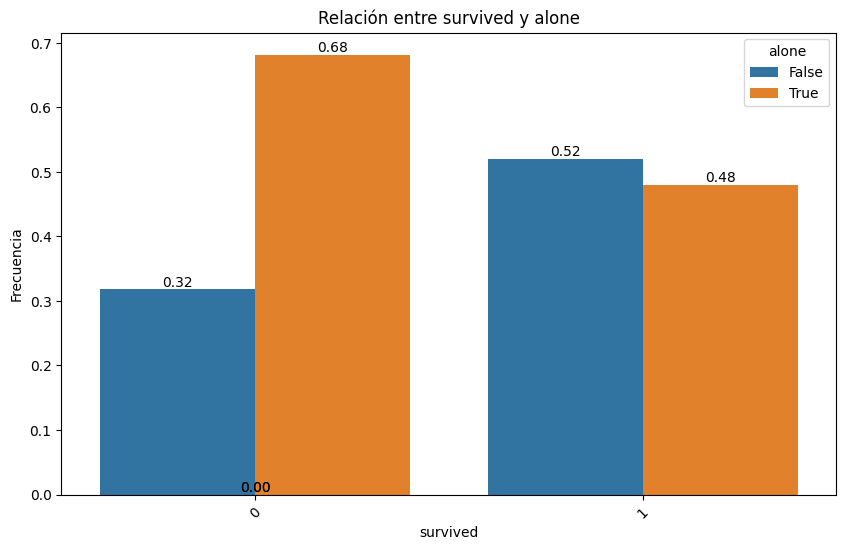

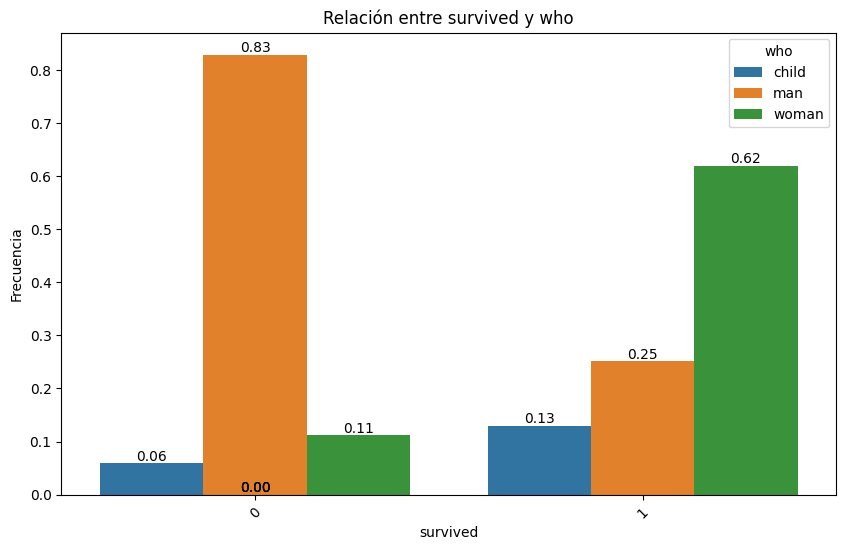

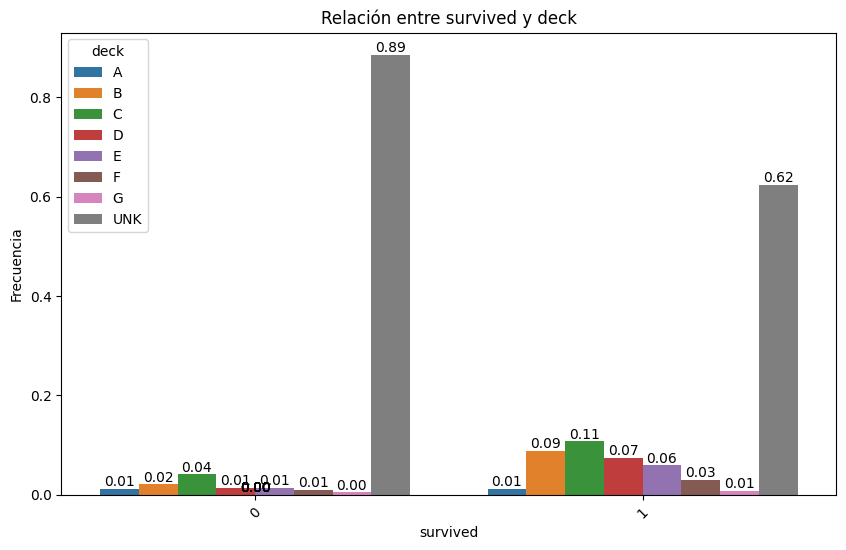

In [18]:
features_num = ["fare","age","sibsp"] 
features_cat = ["pclass","sex","embarked","alone","who","deck"]
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

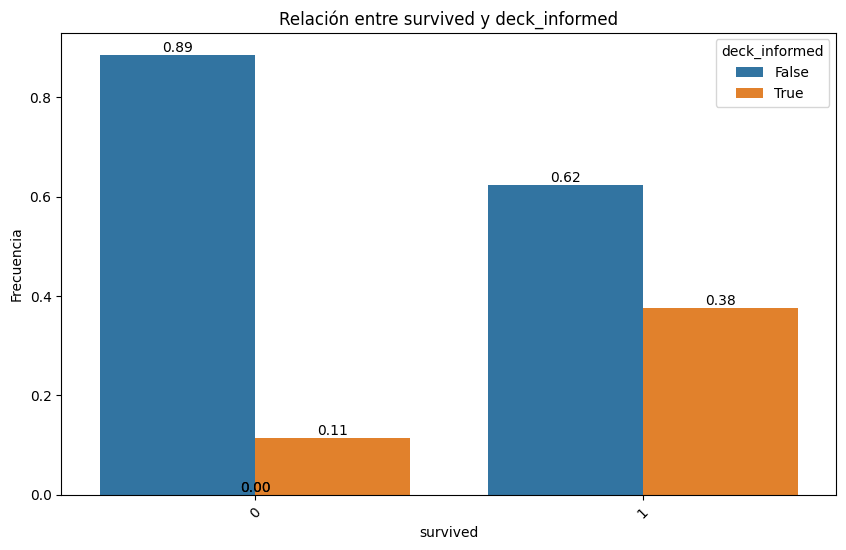

In [19]:

train_set["deck_informed"] = train_set.deck != "UNK"
test_set["deck_informed"] = test_set.deck != "UNK"

bt.plot_categorical_relationship_fin(train_set, target,"deck_informed", show_values= True, relative_freq= True)

In [20]:
features_cat.remove("deck")
features_cat.append("deck_informed")


In [21]:
from sklearn.preprocessing import OrdinalEncoder

categories = [["female","male"], ["S","C","Q"], ["child","woman","man"]]

encoder = OrdinalEncoder(categories= categories)

train_set[["sex","embarked","who"]] = encoder.fit_transform(train_set[["sex","embarked","who"]])
test_set[["sex","embarked","who"]] = encoder.transform(test_set[["sex","embarked","who"]])

train_set[["sex","embarked","who"]]

,sex,embarked,who
46,1.0,2.0,2.0
230,0.0,0.0,1.0
657,0.0,2.0,1.0
888,0.0,0.0,1.0
809,0.0,0.0,1.0
...,...,...,...
222,1.0,0.0,2.0
167,0.0,0.0,1.0
123,0.0,0.0,1.0
150,1.0,0.0,2.0


array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>, <Axes: >]], dtype=object)

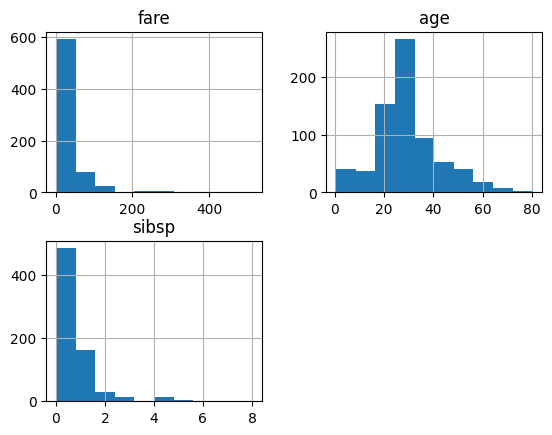

In [22]:
train_set[features_num].hist()

<Axes: >

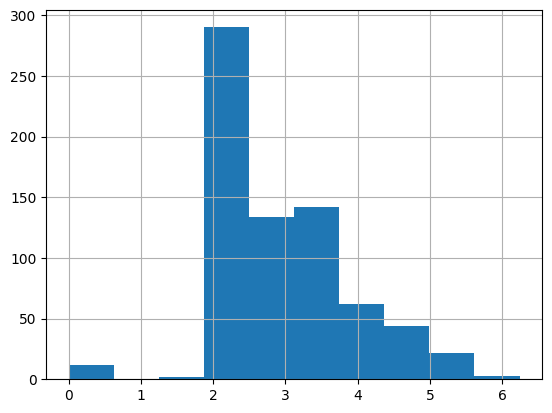

In [23]:
(train_set["fare"]+1).apply(np.log).hist()

<Axes: >

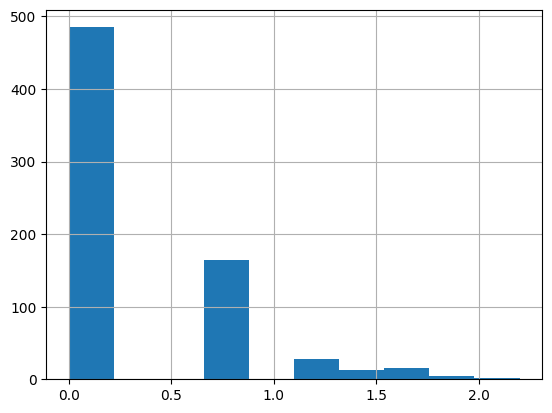

In [24]:
np.log(train_set["sibsp"]+1).hist()

In [25]:
train_set["fare"] = np.sqrt(train_set["fare"])
test_set["fare"] = np.sqrt(test_set["fare"])

train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_informed
46,0,3,1.0,30.0,1,0,3.937004,2.0,Third,2.0,True,UNK,Queenstown,no,False,False
230,1,1,0.0,35.0,1,0,9.136465,0.0,First,1.0,False,C,Southampton,yes,False,True
657,0,3,0.0,32.0,1,1,3.937004,2.0,Third,1.0,False,UNK,Queenstown,no,False,False
888,0,3,0.0,30.0,1,2,4.842520,0.0,Third,1.0,False,UNK,Southampton,no,False,False
809,1,1,0.0,33.0,1,0,7.286975,0.0,First,1.0,False,E,Southampton,yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,3,1.0,51.0,0,0,2.837252,0.0,Third,2.0,True,UNK,Southampton,no,True,False
167,0,3,0.0,45.0,1,4,5.282045,0.0,Third,1.0,False,UNK,Southampton,no,False,False
123,1,2,0.0,32.5,0,0,3.605551,0.0,Second,1.0,False,E,Southampton,yes,True,True
150,0,2,1.0,51.0,0,0,3.539068,0.0,Second,2.0,True,UNK,Southampton,no,True,False


In [26]:
features_set_cat_1 = ["pclass","who"] 
features_set_cat_2 = features_cat 

In [29]:
X_train = train_set[features_set_cat_1]
y_train = train_set[target]

X_test = test_set[features_set_cat_1]
y_test = test_set[target]

log_class_1 = LogisticRegression(max_iter = 10000) # Hiperparámetros

log_class_1.fit(X_train, y_train)



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       440
           1       0.84      0.58      0.68       271

    accuracy                           0.80       711
   macro avg       0.81      0.75      0.77       711
weighted avg       0.80      0.80      0.79       711



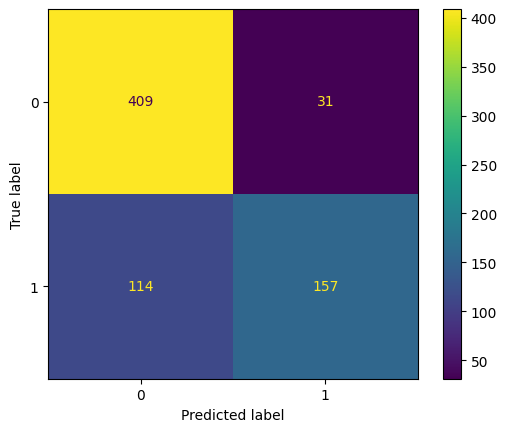

In [30]:
def metrics_titanic(model, X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

metrics_titanic(log_class_1, X_train, y_train)

AUROC: 0.83


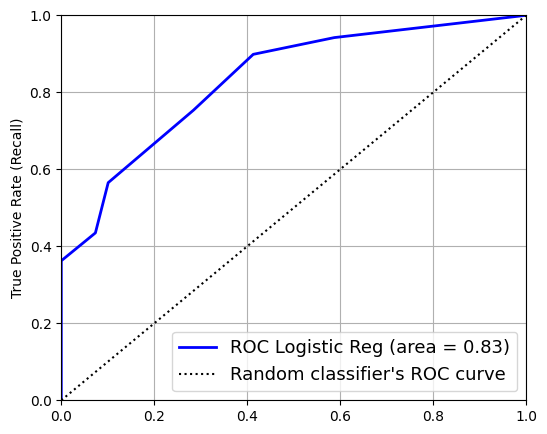

In [31]:
from sklearn.metrics import roc_curve, auc
scores = log_class_1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()